In [ ]:
#For upload csv file to colab
from google.colab import files
uploaded = files.upload()

Saving Freq-PHO-Binary.csv to Freq-PHO-Binary.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Freq-PHO-Binary.csv']))
display(df)

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4,3,2,1,0,2,2,1,NO
1,Female,8,0,2,0,1,0,0,4,NO
2,Male,5,0,0,0,14,2,0,15,NO
3,Male,7,0,3,0,0,5,0,0,NO
4,Male,3,2,1,0,2,1,0,6,YES
...,...,...,...,...,...,...,...,...,...,...
95,Female,10,9,0,0,2,0,4,18,YES
96,Female,6,1,0,0,3,0,0,11,YES
97,Male,4,3,0,2,0,2,0,4,NO
98,Male,2,0,1,0,2,1,0,9,NO


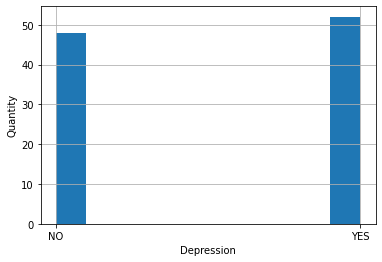

In [ ]:
#Determine class distribution
import matplotlib.pyplot as plt

df["Depression"].hist()
plt.xlabel('Depression')
plt.ylabel('Quantity')
plt.show()

In [ ]:
import pandas as pd

#Encode data to 0 and 1
encode_df = pd.get_dummies(df[['Gender','Depression']], drop_first=True)
encoded_df = df.join(encode_df)
print("Before drop extra column:")
display(encoded_df)

encoded_df.drop(['Gender','Depression'],axis=1, inplace=True)
print("After drop extra column:")
display(encoded_df)

Before drop extra column:


,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression,Gender_Male,Depression_YES
0,Female,4,3,2,1,0,2,2,1,NO,0,0
1,Female,8,0,2,0,1,0,0,4,NO,0,0
2,Male,5,0,0,0,14,2,0,15,NO,1,0
3,Male,7,0,3,0,0,5,0,0,NO,1,0
4,Male,3,2,1,0,2,1,0,6,YES,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,10,9,0,0,2,0,4,18,YES,0,1
96,Female,6,1,0,0,3,0,0,11,YES,0,1
97,Male,4,3,0,2,0,2,0,4,NO,1,0
98,Male,2,0,1,0,2,1,0,9,NO,1,0


After drop extra column:


,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Gender_Male,Depression_YES
0,4,3,2,1,0,2,2,1,0,0
1,8,0,2,0,1,0,0,4,0,0
2,5,0,0,0,14,2,0,15,1,0
3,7,0,3,0,0,5,0,0,1,0
4,3,2,1,0,2,1,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...
95,10,9,0,0,2,0,4,18,0,1
96,6,1,0,0,3,0,0,11,0,1
97,4,3,0,2,0,2,0,4,1,0
98,2,0,1,0,2,1,0,9,1,0


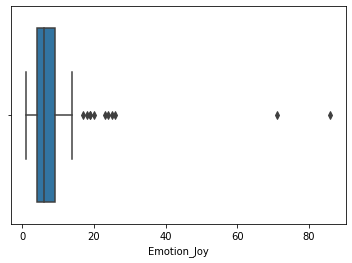

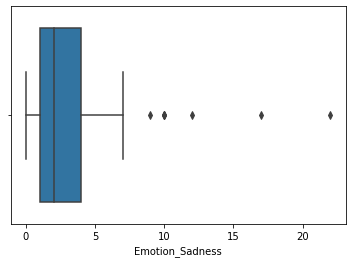

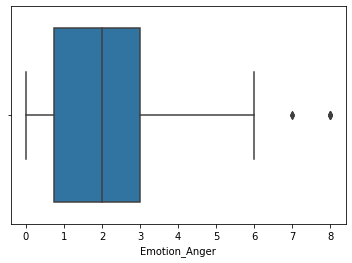

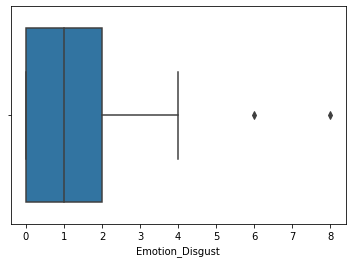

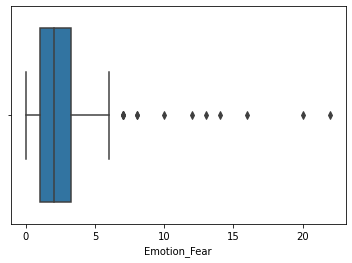

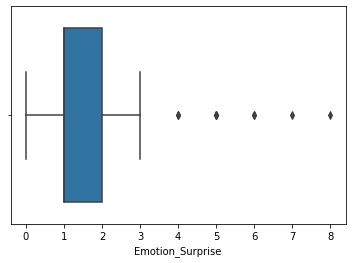

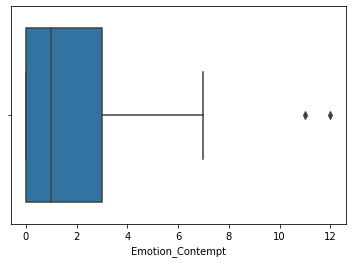

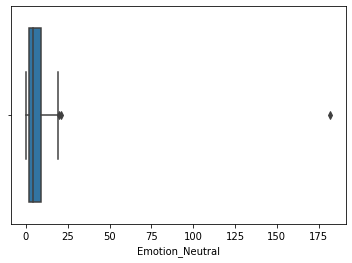

In [ ]:
#View outlier in boxplot
import matplotlib.pyplot as plt
import seaborn as sns

for column in encoded_df.columns:
  if (column != 'Depression_YES') and (column != 'Gender_Male'):
    sns.boxplot(x=column, data=encoded_df)
    plt.show()

In [ ]:
#Find outliers
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = MinMaxScaler()
standardizer = StandardScaler()

#Detect outlier using iqr
for column in encoded_df.columns:
  if (column != 'Depression_YES') and (column != 'Gender_Male'):
    Q1 = encoded_df[column].quantile(0.25)
    Q2 = encoded_df[column].quantile(0.5)
    Q3 = encoded_df[column].quantile(0.75)
    iqr = Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    outliers = df[(encoded_df[column] < lower) | (encoded_df[column] > upper)][column]
    
    if not outliers.empty:
      print("Column {}: outliers = {}".format(column, list(outliers)))
   
    else:
      print("Column {}: no outliers".format(column))

#Perform standardization and min max normalisation
c = ['Emotion_Joy','Emotion_Fear','Emotion_Contempt','Emotion_Sadness','Emotion_Anger','Emotion_Neutral','Emotion_Disgust','Emotion_Surprise']
encoded_df[c] = standardizer.fit_transform(encoded_df[c])
encoded_df[c] = scaler.fit_transform(encoded_df[c])
display(encoded_df)

Column Emotion_Joy: outliers = [23, 19, 18, 25, 19, 26, 24, 71, 17, 20, 86]
Column Emotion_Sadness: outliers = [12, 22, 10, 10, 10, 17, 9]
Column Emotion_Anger: outliers = [8, 7, 8, 7, 8, 8, 8]
Column Emotion_Disgust: outliers = [8, 6]
Column Emotion_Fear: outliers = [14, 7, 16, 7, 7, 8, 13, 8, 12, 7, 22, 10, 20]
Column Emotion_Surprise: outliers = [5, 4, 5, 8, 7, 4, 5, 6, 5, 6]
Column Emotion_Contempt: outliers = [11, 12]
Column Emotion_Neutral: outliers = [20, 21, 182]


,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Gender_Male,Depression_YES
0,0.035294,0.136364,0.250,0.125,0.000000,0.250,0.166667,0.005495,0,0
1,0.082353,0.000000,0.250,0.000,0.045455,0.000,0.000000,0.021978,0,0
2,0.047059,0.000000,0.000,0.000,0.636364,0.250,0.000000,0.082418,1,0
3,0.070588,0.000000,0.375,0.000,0.000000,0.625,0.000000,0.000000,1,0
4,0.023529,0.090909,0.125,0.000,0.090909,0.125,0.000000,0.032967,1,1
...,...,...,...,...,...,...,...,...,...,...
95,0.105882,0.409091,0.000,0.000,0.090909,0.000,0.333333,0.098901,0,1
96,0.058824,0.045455,0.000,0.000,0.136364,0.000,0.000000,0.060440,0,1
97,0.035294,0.136364,0.000,0.250,0.000000,0.250,0.000000,0.021978,1,0
98,0.011765,0.000000,0.125,0.000,0.090909,0.125,0.000000,0.049451,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

x_ori = encoded_df.drop(columns=['Depression_YES'])
y_ori = encoded_df['Depression_YES']

# Check for missing values
print(x_ori.isnull().sum())

#Feature slection
classifier = RandomForestClassifier(random_state=42)
selector = SelectFromModel(estimator=classifier, max_features=9)

x_new = selector.fit_transform(x_ori,y_ori)
selected = selector.get_support(indices=True)
selected_name = x_ori.columns[selected]
x_selected = pd.DataFrame(x_new, columns=selected_name)
# Join everything back together
encoded_df_selected = pd.concat([x_selected, y_ori], axis=1)
print("After selection:")
display(encoded_df_selected)

#Split x and y using the selected feature
x = encoded_df_selected.drop(columns=['Depression_YES'])
y = encoded_df_selected['Depression_YES']


Emotion_Joy         0
Emotion_Sadness     0
Emotion_Anger       0
Emotion_Disgust     0
Emotion_Fear        0
Emotion_Surprise    0
Emotion_Contempt    0
Emotion_Neutral     0
Gender_Male         0
dtype: int64
After selection:


,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Fear,Emotion_Neutral,Depression_YES
0,0.035294,0.136364,0.250,0.000000,0.005495,0
1,0.082353,0.000000,0.250,0.045455,0.021978,0
2,0.047059,0.000000,0.000,0.636364,0.082418,0
3,0.070588,0.000000,0.375,0.000000,0.000000,0
4,0.023529,0.090909,0.125,0.090909,0.032967,1
...,...,...,...,...,...,...
95,0.105882,0.409091,0.000,0.090909,0.098901,1
96,0.058824,0.045455,0.000,0.136364,0.060440,1
97,0.035294,0.136364,0.000,0.000000,0.021978,0
98,0.011765,0.000000,0.125,0.090909,0.049451,0


In [ ]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#for train_index, test_index in kf.split(x):
    #X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 5) (80,)
(20, 5) (20,)


In [ ]:
# Calculate probability for each class
DepressProb = {}
for i in y_train.unique():
    DepressProb [i] = len(y_train[y_train == i]) / len(y_train)
print(DepressProb)

# Calculate likelihood probability
likelihood = {}
for i in y_train.unique():
    likelihood[i] = {}
    for col in X_train.columns:
        feature_prob = {}
        for value in X_train[col].unique():
            feature_prob[value] = len(X_train[(X_train[col] == value) & (y_train == i)]) / len(X_train[y_train == i])
        likelihood[i][col] = feature_prob
print(likelihood)

{1: 0.525, 0: 0.475}
{1: {'Emotion_Joy': {0.05882352941176471: 0.2619047619047619, 0.0823529411764706: 0.047619047619047616, 0.011764705882352941: 0.09523809523809523, 0.03529411764705883: 0.047619047619047616, 0.11764705882352944: 0.07142857142857142, 0.10588235294117648: 0.07142857142857142, 0.023529411764705896: 0.023809523809523808, 0.04705882352941177: 0.07142857142857142, 0.28235294117647064: 0.0, 0.2588235294117648: 0.0, 0.8235294117647061: 0.0, 0.2: 0.0, 0.0: 0.07142857142857142, 0.09411764705882354: 0.023809523809523808, 0.07058823529411766: 0.09523809523809523, 0.21176470588235297: 0.023809523809523808, 0.2705882352941177: 0.023809523809523808, 0.12941176470588237: 0.047619047619047616, 0.15294117647058825: 0.0, 0.22352941176470592: 0.023809523809523808}, 'Emotion_Sadness': {0.0909090909090909: 0.2619047619047619, 0.04545454545454544: 0.07142857142857142, 0.18181818181818177: 0.19047619047619047, 0.13636363636363633: 0.19047619047619047, 0.0: 0.07142857142857142, 0.2272727272

In [ ]:
# Make predictions on the test set
predicted = []
for i in range(len(X_test)):
    probs = {}
    for p in DepressProb:
        prob = DepressProb[p]
        for feature in X_test.columns:
            value = X_test.iloc[i][feature]
            if value in likelihood[p][feature]:
              prob *= likelihood[p][feature][value]
            else:
              # if no see in training data
              # Apply Laplace smoothing
              alpha = 1  
              count = alpha / (len(X_train[feature].unique()) + alpha)
              prob *= count
        probs[p] = prob
    # Choose highest probability
    predicted.append(max(probs, key=probs.get))
print(predicted)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]


Accuracy: 70.00%


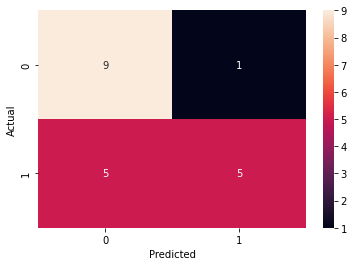

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, predicted)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()